In [1]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.optimize as opt
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score

In [2]:
# Dataset
chd_data = pd.read_csv('heart.csv')
chd_data.drop(['education'], inplace=True, axis=1)

In [4]:
# Removing NaN
chd_data.dropna(axis=0, inplace=True)
print(chd_data.head(), chd_data.shape)
print(chd_data.TenYearCHD.value_counts())

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0   (1390, 15)
0    1178

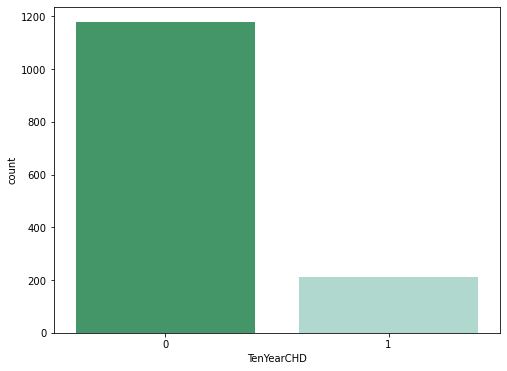

In [5]:
# Counting no. of patients affected with CHD

plt.figure(figsize=(8, 6))
sn.countplot(x="TenYearCHD", data=chd_data, palette="BuGn_r")
plt.show()

In [6]:
# Train and test sets
# ----------------------
# Declaration of x and y variables (axis)
x = np.asarray(chd_data[['age', 'male', 'cigsPerDay', 'totChol', 'glucose']])
y = np.asarray(chd_data['TenYearCHD'])

In [7]:
# Normalize the dataset
x = preprocessing.StandardScaler().fit(x).transform(x)

In [8]:
# Actually train and test x and y sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (973, 5) (973,)
Test set:  (417, 5) (417,)


In [9]:
# Modeling the dataset
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [10]:
# Evaluation and accuracy
print('')
print('Accuracy of the model in Jaccard score is : ',
      jaccard_score(y_test, y_pred))


Accuracy of the model in Jaccard score is :  0.014285714285714285


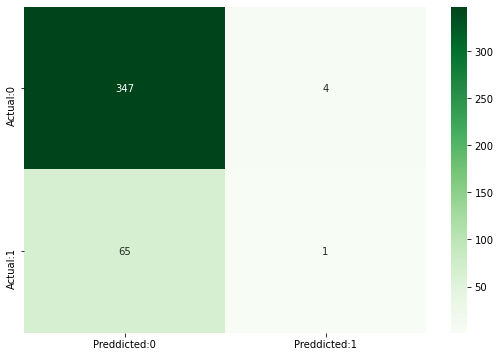

The details for confusion matrix is : 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       351
           1       0.20      0.02      0.03        66

    accuracy                           0.83       417
   macro avg       0.52      0.50      0.47       417
weighted avg       0.74      0.83      0.77       417



In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_setup = pd.DataFrame(data=cm, columns=[
                        'Preddicted:0', 'Preddicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(9, 6))
sn.heatmap(cm_setup, annot=True, fmt='d', cmap="Greens")
plt.show()

print('The details for confusion matrix is : ')
print(classification_report(y_test, y_pred))